<a href="https://colab.research.google.com/github/mofuoku417/Univariate_Crude_Palm_Oil_Price_Prediction/blob/main/Univariate_Palm_Oil_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Predict Monthly Crude Palm Oil Price  with   Deep Learning (Recurrent Neural Network Univariate Time series)**


> Project Objective:

> Design and Build an RNN in tensorflow to predict Monthly Crude Palm Oil Price


  * Data range: 1993 - 2022

  The dataset is a CSV format with: 

  1. Monthly timestamp
  2. Monthly Crude Palm Oil Prices

---------------------------------------------


1. Project Overview and Import Libraries
2. Load and Inspect Monthly Crude Oil Price History
1. Data Preprocessing
2. Build the RNN model
1. Train the RNN
2. Plot Metrics and Evaluate the Model
2. Monthly Crude Palm Oil Prices
2. Visualize the predictions

###Load the Required Libraries

In [7]:
import math 
import numpy as np # Python's fundamental package for scientific computing
import pandas as pd # For data analysis and manipulation
from datetime import date, timedelta # Date Operations
import matplotlib.pyplot as plt # To aid in visualizing
import matplotlib.dates as mdates # Date formatting
from sklearn.metrics import mean_absolute_error, mean_squared_error # To assess model performance error computation
from sklearn.preprocessing import MinMaxScaler # to standardize the crude palm oil price data 
from tensorflow.keras.models import Sequential # Deep learning library, that is used in neural networks
from tensorflow.keras.layers import RNN, Dense # Deep learning classes for densely linked recurrent and regular layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pandas import read_csv
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [14]:
# Establishing a timetable for data extraction
today = date.today()
end_date = today.strftime("%Y-%m")
start_date = '1993-03'

featurename = 'cpo_pri'


#Loading dataset
path = '/content/df_cl.csv'
df = read_csv(path, parse_dates=True)

# Examining the dataset's structure
print(df.shape)
df.head(5)

(361, 2)


,date,cpo_pri
0,1993-03,408
1,1993-04,392
2,1993-05,371
3,1993-06,356
4,1993-07,362


In [15]:
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # Selecting only date
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head()

,cpo_pri
date,
1993-03-01,408
1993-04-01,392
1993-05-01,371
1993-06-01,356
1993-07-01,362


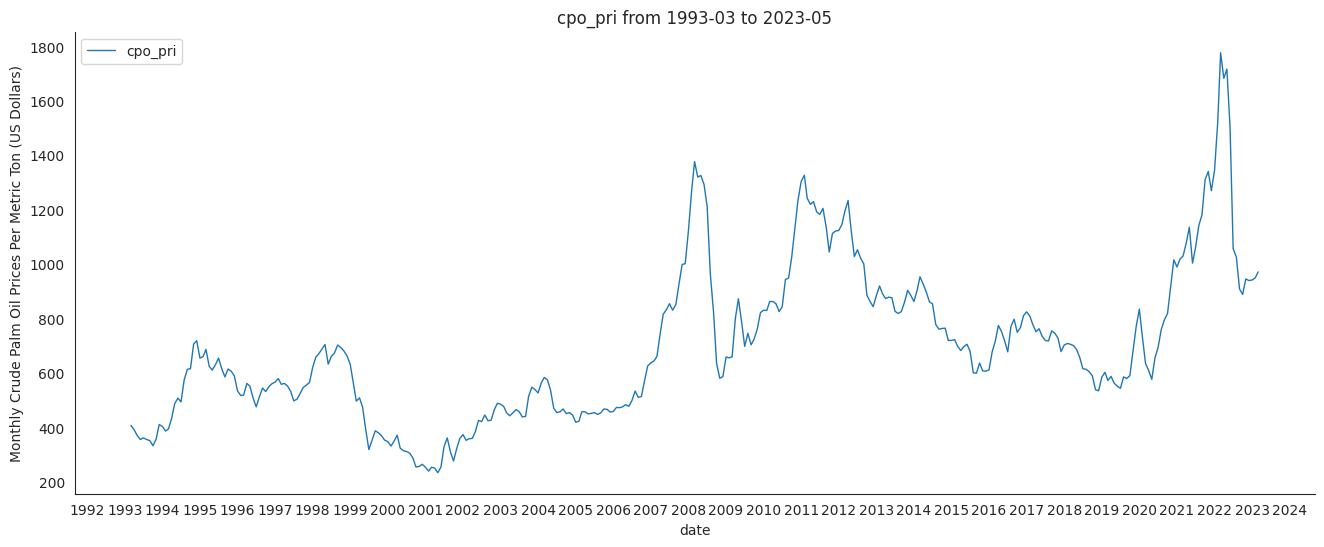

In [16]:
# Constructing a Lineplot
years = mdates.YearLocator() 
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)
ax1.legend([featurename], fontsize=12)
plt.title(featurename + ' from '+ start_date + ' to ' + end_date)
sns.lineplot(data=df['cpo_pri'], label=featurename, linewidth=1.0)
plt.ylabel('Monthly Crude Palm Oil Prices Per Metric Ton (US Dollars)')
plt.show()

In [17]:
# Target Selection 
train_df = df.filter(['cpo_pri'])
data_unsc = train_df.values # data_unscaled data

# Compute the number of rows required to train the model on 80% of the data. 
train_data_len = math.ceil(len(data_unsc) * 0.7)

# Scale each characteristic to a value between 0 and 1 to transform it.
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unsc)

In [18]:
# Set the sequence len - the period for making a single forecast.
sequence_len = 60

# Index of Prediction
index_cpo_pri = train_df.columns.get_loc("cpo_pri")
print(index_cpo_pri)
# Divide the training data into train and train data sets.
# In the first stage, we determine the number of rows required to train the model on 80% of the data. 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Generate training and test data.
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_len:, :]

# The RNN model requires data in the following formats: [samples, time steps, features].
def partition_dataset(sequence_len, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_len, data_len):
        x.append(train_df[i-sequence_len:i,:]) 
        y.append(train_df[i, index_cpo_pri]) 
    
    # Convert the x and y variables to numpy arrays.
    x = np.array(x)
    y = np.array(y)
    return x, y

# Create training and testing data.
X_train, y_train = partition_dataset(sequence_len, train_data)
X_test, y_test = partition_dataset(sequence_len, test_data)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Verify that the prediction value and the input value match
print(X_test[1][sequence_len-1][index_cpo_pri])
print(y_test[0])

0
(229, 60, 1) (229,)
(72, 60, 1) (72,)
0.3357096565132858
0.3357096565132858


In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

regressor = Sequential()

regressor.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 30,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 20))
regressor.add(Dropout(0.2))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


regressor.fit(X_train, y_train, epochs = 250, batch_size = 50)

Epoch 1/250
5/5 [==============================] - 7s 117ms/step - loss: 0.2035
Epoch 2/250
5/5 [==============================] - 1s 117ms/step - loss: 0.0643
Epoch 3/250
5/5 [==============================] - 1s 124ms/step - loss: 0.0385
Epoch 4/250
5/5 [==============================] - 1s 117ms/step - loss: 0.0248
Epoch 5/250
5/5 [==============================] - 1s 128ms/step - loss: 0.0251
Epoch 6/250
5/5 [==============================] - 1s 148ms/step - loss: 0.0241
Epoch 7/250
5/5 [==============================] - 1s 199ms/step - loss: 0.0190
Epoch 8/250
5/5 [==============================] - 1s 178ms/step - loss: 0.0163
Epoch 9/250
5/5 [==============================] - 1s 197ms/step - loss: 0.0151
Epoch 10/250
5/5 [==============================] - 1s 134ms/step - loss: 0.0148
Epoch 11/250
5/5 [==============================] - 0s 101ms/step - loss: 0.0164
Epoch 12/250
5/5 [==============================] - 1s 118ms/step - loss: 0.0160
Epoch 13/250
5/5 [===================

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = regressor.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=250,batch_size=50,verbose=1, callbacks=[callback])

Epoch 1/250
5/5 [==============================] - 2s 412ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 2/250
5/5 [==============================] - 1s 248ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 3/250
5/5 [==============================] - 1s 243ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 4/250
5/5 [==============================] - 1s 234ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 5/250
5/5 [==============================] - 2s 430ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 6/250
5/5 [==============================] - 2s 344ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 7/250
5/5 [==============================] - 1s 238ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 8/250
5/5 [==============================] - 1s 240ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 9/250
5/5 [==============================] - 1s 249ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 10/250
5/5 [==============================] - 1s 240ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 11/

In [ ]:
'''
# Set up the neural network model


RNN_model = Sequential()

neurons = sequence_len

RNN_model.add(RNN(neurons, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
RNN_model.add(RNN(neurons, return_sequences=False))
RNN_model.add(Dense(25, activation='relu'))
RNN_model.add(Dense(1))

# Compile the model
RNN_model.compile(optimizer='adam', loss='mean_squared_error')
'''

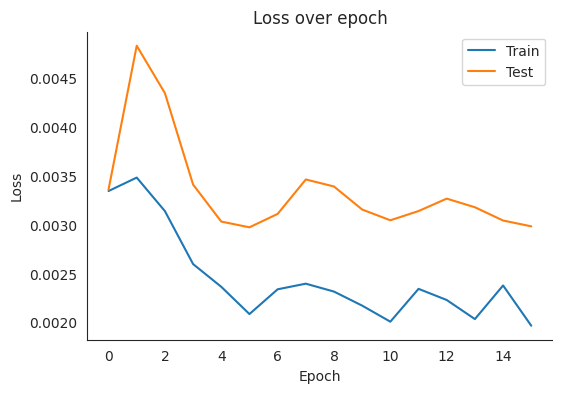

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Loss over epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [29]:
# Obtain the predicted values
RNN_pred_scaled = regressor.predict(X_test)
RNN_pred = mmscaler.inverse_transform(RNN_pred_scaled)
y_test_unsc = mmscaler.inverse_transform(y_test.reshape(-1, 1))

3/3 [==============================] - 0s 22ms/step


In [30]:
# Mean Absolute Error (MAE)
RNN_MAE = mean_absolute_error(y_test_unsc, RNN_pred)
print(f'Median Absolute Error (MAE): {np.round(RNN_MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
RNN_MAPE = np.mean((np.abs(np.subtract(y_test_unsc, RNN_pred)/ y_test_unsc))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(RNN_MAPE, 2)} %')

# Root Mean Squared Error (RMSE)
RNN_RMSE = mean_squared_error(y_test_unsc, RNN_pred) ** 0.5
print(f'Root Mean Squared Error (RMSE): {np.round(RNN_RMSE, 2)} %')

# Mean Squared Error (MSE)
RNN_MSE = mean_squared_error(y_test_unsc, RNN_pred)
print('MSE value of the RNN Model:', RNN_MSE )

# r2_score
RNN_r2 = r2_score(y_test_unsc, RNN_pred)
print(f'R^2 Score: {np.round(RNN_r2, 2)} %')

Median Absolute Error (MAE): 56.57
Mean Absolute Percentage Error (MAPE): 6.25 %
Root Mean Squared Error (RMSE): 84.12 %
MSE value of the RNN Model: 7076.197139845231
R^2 Score: 0.92 %


In [31]:
train = pd.DataFrame(train_df[:train_data_len + 1]).rename(columns={'cpo_pri': 'X_train'})
train

,X_train
date,
1993-03-01,408
1993-04-01,392
1993-05-01,371
1993-06-01,356
1993-07-01,362
...,...
2016-12-01,811
2017-01-01,825
2017-02-01,809


<Axes: title={'center': 'RNN Predictions vs Actual'}, xlabel='date', ylabel='cpo_pri'>

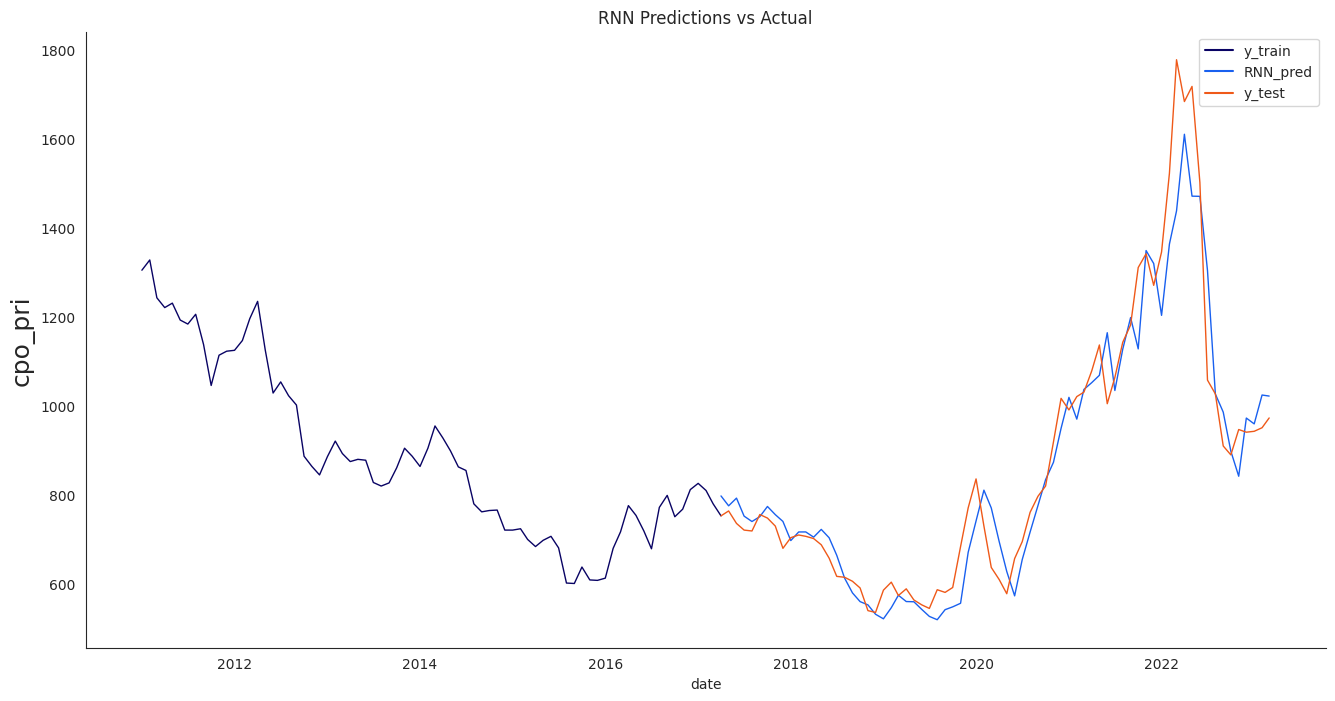

In [32]:
# The date from which on the date is displayed
display_start_date = "2010-12" 

# Add the difference between the valid and predicted prices
train = pd.DataFrame(train_df[:train_data_len + 1]).rename(columns={'cpo_pri': 'y_train'})
valid = pd.DataFrame(train_df[train_data_len:]).rename(columns={'cpo_pri': 'y_test'})
valid.insert(1, "RNN_pred", RNN_pred, True)
valid.insert(1, "residuals", valid["RNN_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > display_start_date]

# Create the lineplot
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=True)
plt.title("RNN Predictions vs Actual")
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
plt.ylabel(featurename, fontsize=18)
sns.lineplot(data=df_union_zoom[['y_train', 'RNN_pred', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)